In [45]:
from tabu import TabuSampler
from sklearn import cluster, datasets, mixture
import copy
import matplotlib.pyplot as plt
import numpy as np
#from anytree import Node, RenderTree
from treelib import Node, Tree

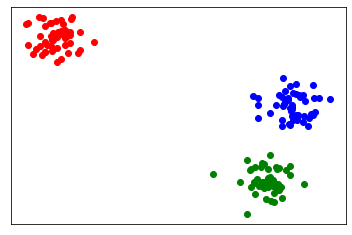

In [46]:
np.random.seed(4)
n_samples = 150
dataset = datasets.make_blobs(n_samples=n_samples, random_state=6)
#dataset = datasets.make_moons(n_samples=n_samples, noise=.05)
#dataset = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)

#print(dataset[0])
fig, ax = plt.subplots()
for i in range(0,150):
    if dataset[1][i] == 0:
        ax.scatter(dataset[0][i,0],dataset[0][i,1],c='b')
    elif dataset[1][i] == 1:
        ax.scatter(dataset[0][i,0],dataset[0][i,1],c='g')
    else:
        ax.scatter(dataset[0][i,0],dataset[0][i,1],c='r')
        
        

#plt.xlim(-2.5, 2.5)
#plt.ylim(-2.5, 2.5)
plt.xticks(())
plt.yticks(())
plt.show()

In [47]:
feature_vecs = dataset[0]
print(feature_vecs[0])
print(feature_vecs[1])
print(str(feature_vecs[0] - feature_vecs[1]))

[-7.77650706  2.35286307]
[-5.16407113  1.80513336]
[-2.61243593  0.54772971]


In [76]:
def binary_clustering(feature_vecs,feature_index):
    h= {}
    J= {}
    cluster1 = [] #stores the indices for the first cluster
    cluster2 = [] #stores the indices for the second cluster
    
    for i in feature_index:
        for j in feature_index:
            if i < j:
                J[(i,j)] = np.linalg.norm(feature_vecs[i] - feature_vecs[j])**2
    
    #Now use a sampler to solve it
    sampler = TabuSampler()
    # Run the problem on the sampler and print the results
    sampleset = sampler.sample_ising(h, J, num_reads = 5,timeout=10000)
    bin_cluster = sampleset.first[0]
    
    for key in bin_cluster:
        #put in cluster 1 if -1, else 2
        if bin_cluster[key] == -1:
            cluster1.append(key)
        elif bin_cluster[key] == 1:
            cluster2.append(key)
            
            
    return cluster1,cluster2

feature_index = [i for i in range(0,n_samples)]
cl1, cl2 = binary_clustering(feature_vecs,feature_index)
#binary_clustering(feature_vecs,feature_index)

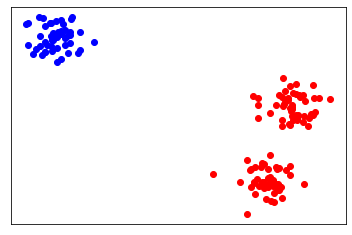

In [65]:
#Let's plot the output
fig, ax = plt.subplots()
for i in range(0,len(feature_vecs)):
    if i in cl1:
        ax.scatter(dataset[0][i,0],dataset[0][i,1],c='b')
    else:
        ax.scatter(dataset[0][i,0],dataset[0][i,1],c='r')
        
        

#plt.xlim(-2.5, 2.5)
#plt.ylim(-2.5, 2.5)
plt.xticks(())
plt.yticks(())
plt.show()

In [35]:
tree = Tree()
tree.create_node("Harry", "harry")  # root node
tree.create_node("Jane", "jane", parent="harry")
tree.create_node("Bill", "bill", parent="harry",data = l)
tree.create_node("Diane", "diane", parent="jane")
tree.create_node("Mary", "mary", parent="diane")
tree.create_node("Mark", "mark", parent="jane")
tree.show()

Harry
├── Bill
└── Jane
    ├── Diane
    │   └── Mary
    └── Mark



In [73]:
x = tree.leaves("harry")
print(x[0].identifier)
print(x[0].data)
print(x[0].predecessor)

bill
[1, 2, 3]
harry


/home/aborle/.virtualenvs/cdl_hack/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated function "bpointer"; use "node.predecessor" instead.
  after removing the cwd from sys.path.


In [77]:
level = 0
node_label = "c" + str(level)+ str(0)
cluster_tree = Tree()
feature_index = [i for i in range(0,n_samples)]
cluster_tree.create_node(node_label, node_label,data=feature_index)
for i in range(0,1):
    cl1, cl2 = binary_clustering(feature_vecs,feature_index)
    child1_node_label = "c" + str(level+1) + str(1)
    child2_node_label = "c" + str(level+1) + str(2)
    cluster_tree.create_node(child1_node_label,child1_node_label,data=cl1,parent=node_label)
    cluster_tree.create_node(child2_node_label,child2_node_label,data=cl2,parent=node_label)
cluster_tree.show()
    
    
    
    

c00
├── c11
└── c12



In [69]:
type(cl1)

list

IndexError: tuple index out of range

[5,
 6,
 10,
 13,
 15,
 16,
 18,
 20,
 22,
 23,
 24,
 26,
 30,
 31,
 38,
 39,
 42,
 47,
 50,
 51,
 56,
 57,
 59,
 61,
 62,
 63,
 65,
 67,
 71,
 72,
 76,
 78,
 79,
 81,
 83,
 85,
 87,
 89,
 90,
 93,
 95,
 96,
 97,
 99,
 100,
 101,
 102,
 103,
 105,
 111,
 113,
 116,
 117,
 118,
 120,
 121,
 124,
 125,
 127,
 129,
 133,
 135,
 136,
 138,
 139,
 143,
 145,
 146]

In [52]:
l

[1, 2, 3]

In [54]:
for i in l:
    for j > i:
        print(str(i)","str(j))

SyntaxError: invalid syntax (<ipython-input-54-5d525a7c7e2f>, line 2)